In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [2]:
# Load data 
data = pd.read_csv('./Assets/data_.csv', index_col = 'Date')
data['y'] = data['log_change']

from Tools.train_test import train_test_split

x_scaler, y_scaler, train_x, train_y, test_x, test_y = train_test_split(data, 0.8)

train_x = torch.from_numpy(train_x).float()
train_y = torch.from_numpy(train_y).float()
test_x = torch.from_numpy(test_x).float()
test_y = torch.from_numpy(test_y).float()

train_loader = DataLoader(TensorDataset(train_x, train_y), batch_size = 32, shuffle = False)
test_loader = DataLoader(TensorDataset(test_x, test_y), batch_size = 32, shuffle = False)

trainX: (2324, 60) trainY: (2324,)
testX: (602, 60) testY: (602,)


In [3]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,pct_change,log_change,volume_change,volume_log_change,...,dealer_buy,dealer_sell,dealer_dif,investment_buy,investment_sell,investment_dif,foreign_buy,foreign_sell,foreign_dif,y
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-10,59.2,58.2,59.0,58.4,53679000.0,38.37,-0.003413,-0.003419,0.173209,0.159743,...,3161497580,2968407011,193090569,3102476560,1648311871,1454164689,1.551380e+10,2.549564e+10,-9981838210,-0.003419
2010-02-22,60.5,59.0,60.5,59.0,47519000.0,38.76,0.010274,0.010222,-0.114756,-0.121892,...,3133892869,2444166818,689726051,2130761100,1359109401,771651699,2.846749e+10,2.503619e+10,3431302085,0.010222
2010-02-23,59.9,59.1,59.6,59.8,50343000.0,39.29,0.013559,0.013468,0.059429,0.057730,...,2000150200,2287498353,-287348153,2263043520,2650742656,-387699136,2.422218e+10,2.360860e+10,613580581,0.013468
2010-02-24,59.2,58.4,59.2,58.5,54884000.0,38.43,-0.021739,-0.021979,0.090201,0.086362,...,2043898760,1998239251,45659509,2258613250,1775532693,483080557,2.027639e+10,2.546846e+10,-5192069643,-0.021979
2010-02-25,58.9,57.9,58.5,58.2,55655000.0,38.24,-0.005128,-0.005141,0.014048,0.013950,...,1728179056,3572176638,-1843997582,1801497370,2286138110,-484640740,2.259238e+10,3.143820e+10,-8845826819,-0.005141


[1/250] Loss: 5.898336637765169
[11/250] Loss: 1.7251082956790924
[21/250] Loss: 1.1262893546372652
[31/250] Loss: 0.9312882060185075
[41/250] Loss: 0.8741380688734353
[51/250] Loss: 0.8298303820192814
[61/250] Loss: 0.7902567507699132
[71/250] Loss: 0.7663315117824823
[81/250] Loss: 0.7504658102989197
[91/250] Loss: 0.79064502264373
[101/250] Loss: 0.7325206277891994
[111/250] Loss: 0.715991783188656
[121/250] Loss: 0.7127926575485617
[131/250] Loss: 0.7213468765839934
[141/250] Loss: 0.7188103217631578
[151/250] Loss: 0.8006262383423746
[161/250] Loss: 0.7979480549693108
[171/250] Loss: 0.6958678411319852
[181/250] Loss: 0.7508317180909216
[191/250] Loss: 0.7479467703960836
[201/250] Loss: 0.7657160959206522
[211/250] Loss: 0.8359561357647181
[221/250] Loss: 0.8118426227010787
[231/250] Loss: 0.7709118132479489
[241/250] Loss: 0.7623126371763647


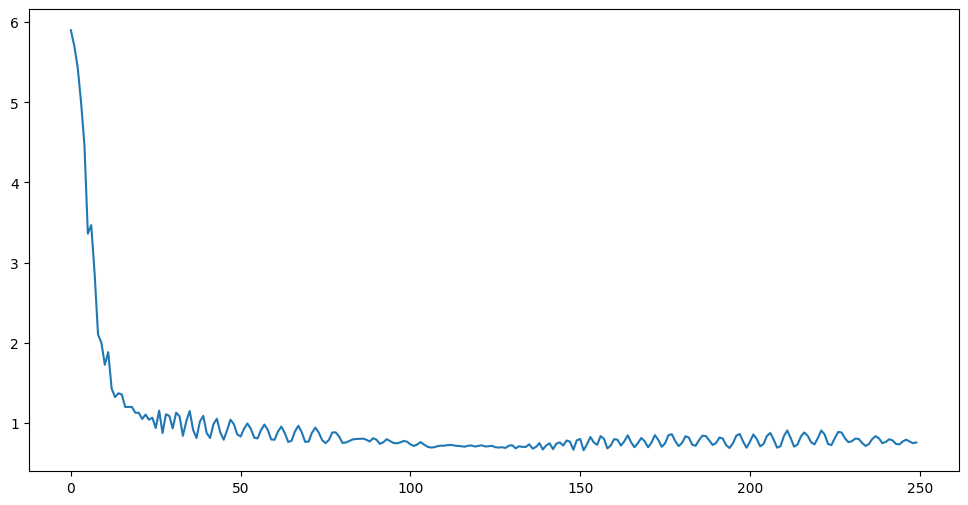

In [4]:
# Train AE model
from Models.AutoEncoder import Autoencoder
from Tools.Training import training_AE

model_ae = Autoencoder([60, 45, 30, 20])
model_ae = training_AE(model_ae, train_loader, 250, 0.0001)

[1/250] Loss: 636.4975895881653
[11/250] Loss: 308.17161417007446
[21/250] Loss: 187.21109652519226
[31/250] Loss: 115.39736878871918
[41/250] Loss: 74.3173086643219
[51/250] Loss: 63.2810183763504
[61/250] Loss: 66.65349251031876
[71/250] Loss: 65.29876017570496
[81/250] Loss: 63.84950566291809
[91/250] Loss: 62.308904588222504
[101/250] Loss: 61.7826988697052
[111/250] Loss: 61.45981705188751
[121/250] Loss: 60.65896040201187
[131/250] Loss: 59.057734072208405
[141/250] Loss: 57.60240399837494
[151/250] Loss: 55.67630583047867
[161/250] Loss: 54.05798941850662
[171/250] Loss: 53.297587513923645
[181/250] Loss: 52.0848987698555
[191/250] Loss: 51.567011535167694
[201/250] Loss: 51.492645621299744
[211/250] Loss: 51.86109918355942
[221/250] Loss: 52.664813816547394
[231/250] Loss: 52.95883756875992
[241/250] Loss: 52.59601855278015


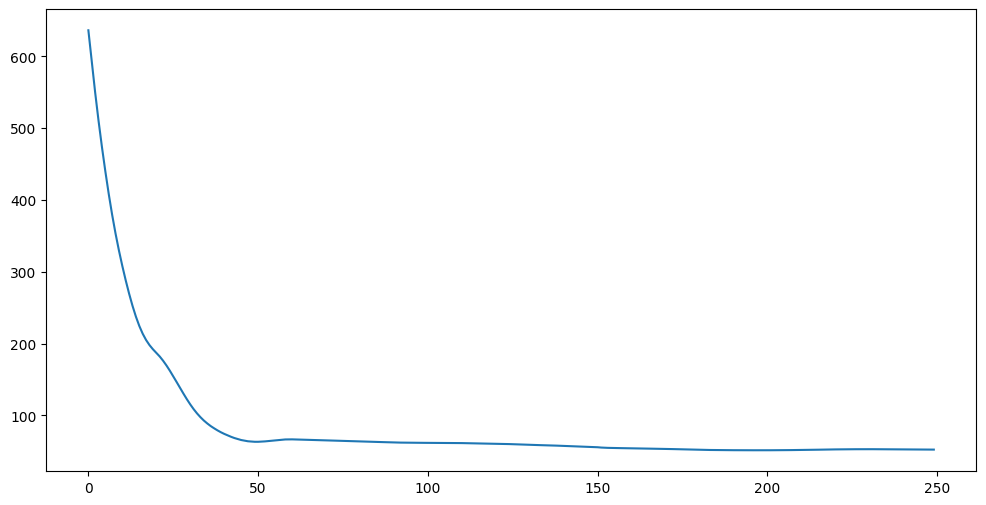

In [5]:
# Train VAE model

from Models.VAE import VAE
from Tools.Training import training_VAE

model_vae = VAE([60, 45, 30, 20], 20)
model_vae = training_VAE(model_vae, train_loader, 250, 0.00001)

In [6]:
# Use AE and VAE compress the data
model_ae.eval()
AE_train_x, _ = model_ae(train_x)
AE_test_x, _ = model_ae(test_x)

model_vae.eval()
_, VAE_train_x, train_x_mu, train_x_var = model_vae(train_x)
_, VAE_test_x, test_x_mu, test_x_var = model_vae(test_x)

# Also use PCA to reduce original data, to reduce the feature dimension
pca = PCA(n_components = 30)
train_x_pca = pca.fit_transform(train_x.detach().numpy())
train_x_pca = torch.from_numpy(train_x_pca).float()
test_x_pca = pca.transform(test_x.detach().numpy())
test_x_pca = torch.from_numpy(test_x_pca).float()

train_x_AE = torch.cat((train_x_pca, AE_train_x.detach()), 1)
test_x_AE = torch.cat((test_x_pca, AE_test_x.detach()), 1)
train_x_VAE = torch.cat((train_x_pca, VAE_train_x.detach()), 1)
test_x_VAE = torch.cat((test_x_pca, VAE_test_x.detach()), 1)

print(f'train_x_AE: {train_x_AE.shape}, test_x_AE: {test_x_AE.shape}')
print(f'train_x_VAE: {train_x_VAE.shape}, test_x_VAE: {test_x_VAE.shape}')


train_x_AE: torch.Size([2324, 50]), test_x_AE: torch.Size([602, 50])
train_x_VAE: torch.Size([2324, 50]), test_x_VAE: torch.Size([602, 50])


In [7]:
from Tools.Training import sliding_window

train_x_AE, train_y_AE = sliding_window(train_x_AE.detach().numpy(), train_y.detach().numpy(), 20)
test_x_AE, test_y_AE = sliding_window(test_x_AE.detach().numpy(), test_y.detach().numpy(), 20)

train_x_VAE, train_y_VAE = sliding_window(train_x_VAE.detach().numpy(), train_y.detach().numpy(), 20)
test_x_VAE, test_y_VAE = sliding_window(test_x_VAE.detach().numpy(), test_y.detach().numpy(), 20)

train_x_pca, train_y_pca = sliding_window(train_x_pca.detach().numpy(), train_y.detach().numpy(), 20)
test_x_pca, test_y_pca = sliding_window(test_x_pca.detach().numpy(), test_y.detach().numpy(), 20)

AE_dataloader = DataLoader(TensorDataset(train_x_AE, train_y_AE), batch_size = 32, shuffle = False)
VAE_dataloader = DataLoader(TensorDataset(train_x_VAE, train_y_VAE), batch_size = 32, shuffle = False)
original_dataloader = DataLoader(TensorDataset(train_x_pca, train_y_pca), batch_size = 32, shuffle = False)



In [11]:
train_x_pca.shape

torch.Size([2304, 20, 30])

[1/100] Loss: 2.395180963911116
[11/100] Loss: 0.7691568736918271
[21/100] Loss: 0.7451734191272408
[31/100] Loss: 0.6551549755968153
[41/100] Loss: 0.5855401111766696
[51/100] Loss: 0.5298819041345268
[61/100] Loss: 0.47848819592036307
[71/100] Loss: 0.42346875462681055
[81/100] Loss: 0.3642278788611293
[91/100] Loss: 0.2880205826368183


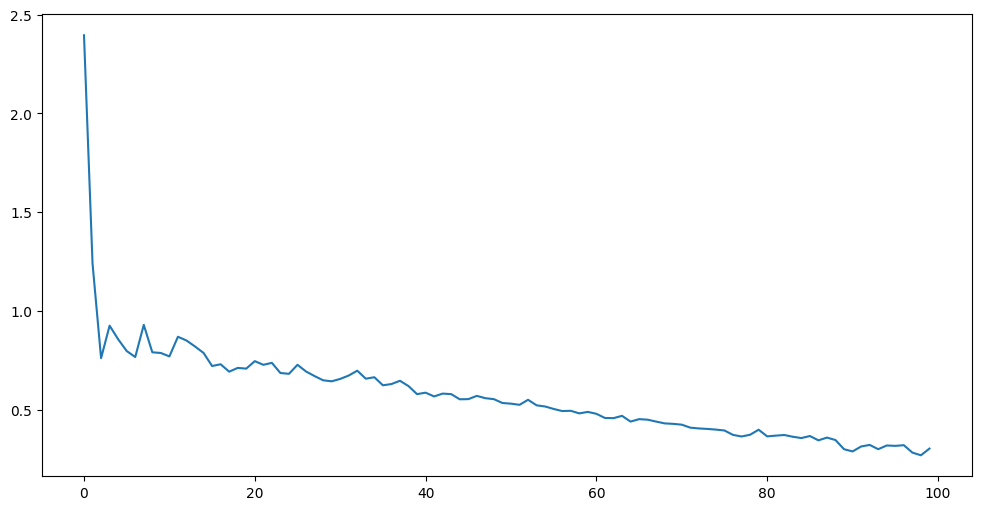

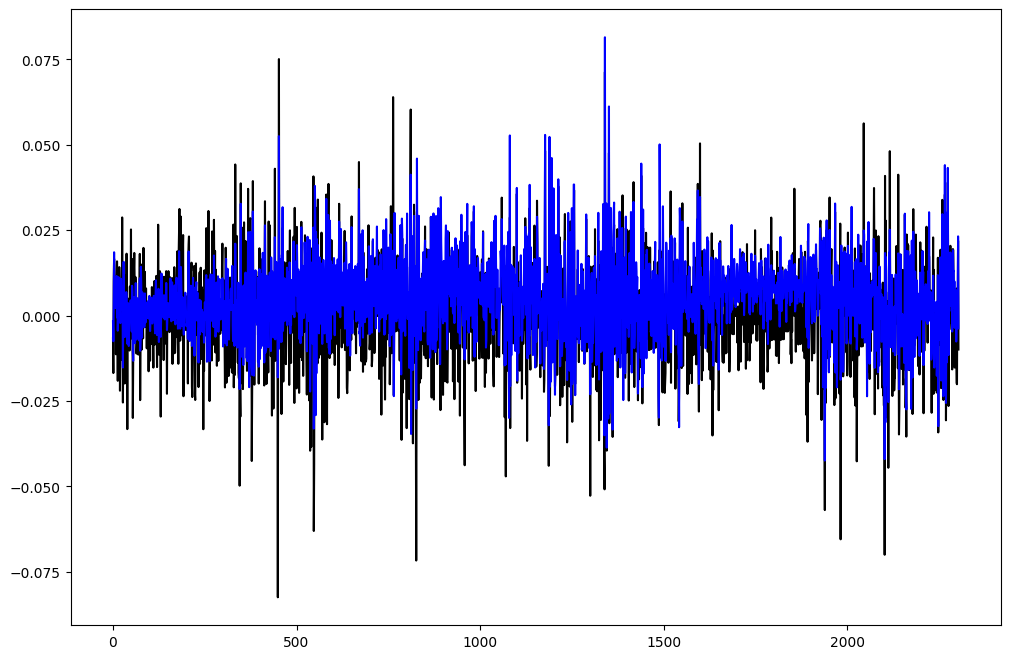

In [8]:
from Models.LSTM import LSTM
from Tools.Training import training_LSTM

lstm_ae = LSTM(50, 100, 2, 1, 0.2)
lstm_ae = training_LSTM(lstm_ae, AE_dataloader, 100, 0.001)

lstm_ae.eval()
predit_y_ae = lstm_ae(train_x_AE)
predit_y_ae = y_scaler.inverse_transform(predit_y_ae.detach().numpy())
actual_y = y_scaler.inverse_transform(train_y_AE.detach().numpy())

plt.figure(figsize=(12, 8))
plt.plot(actual_y, color = 'black')
plt.plot(predit_y_ae, color = 'blue')

[1/100] Loss: 1.5406341657508165
[11/100] Loss: 0.6244226958369836
[21/100] Loss: 0.3631861642934382
[31/100] Loss: 0.20222492329776287
[41/100] Loss: 0.1254238030523993
[51/100] Loss: 0.0756935640820302
[61/100] Loss: 0.059176753769861534
[71/100] Loss: 0.043632153276121244
[81/100] Loss: 0.04371982108568773
[91/100] Loss: 0.06577018363168463


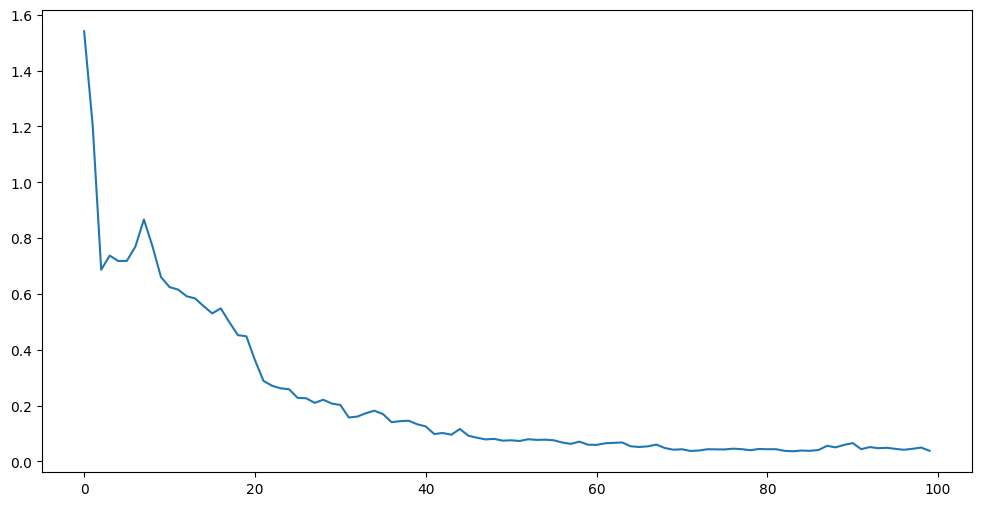

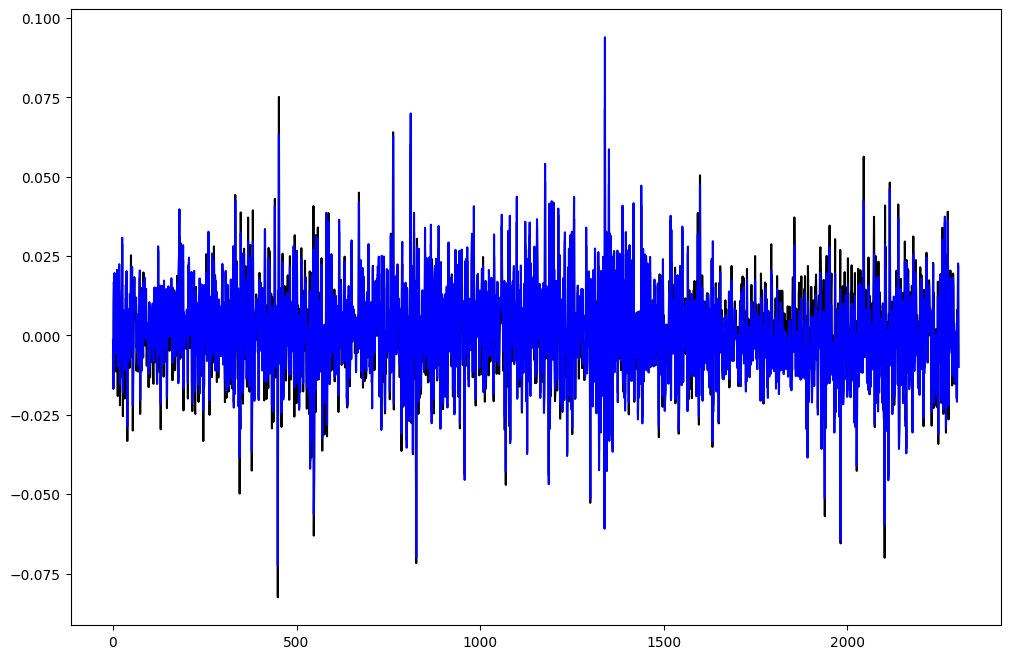

In [9]:
from Models.LSTM import LSTM
from Tools.Training import training_LSTM

lstm_vae = LSTM(50, 100, 2, 1, 0.2)
lstm_vae = training_LSTM(lstm_vae, VAE_dataloader, 100, 0.001)

lstm_vae.eval()
predit_y_vae = lstm_vae(train_x_VAE)
predit_y_vae = y_scaler.inverse_transform(predit_y_vae.detach().numpy())
actual_y = y_scaler.inverse_transform(train_y_VAE.detach().numpy())

plt.figure(figsize=(12, 8))
plt.plot(actual_y, color = 'black')
plt.plot(predit_y_vae, color = 'blue')

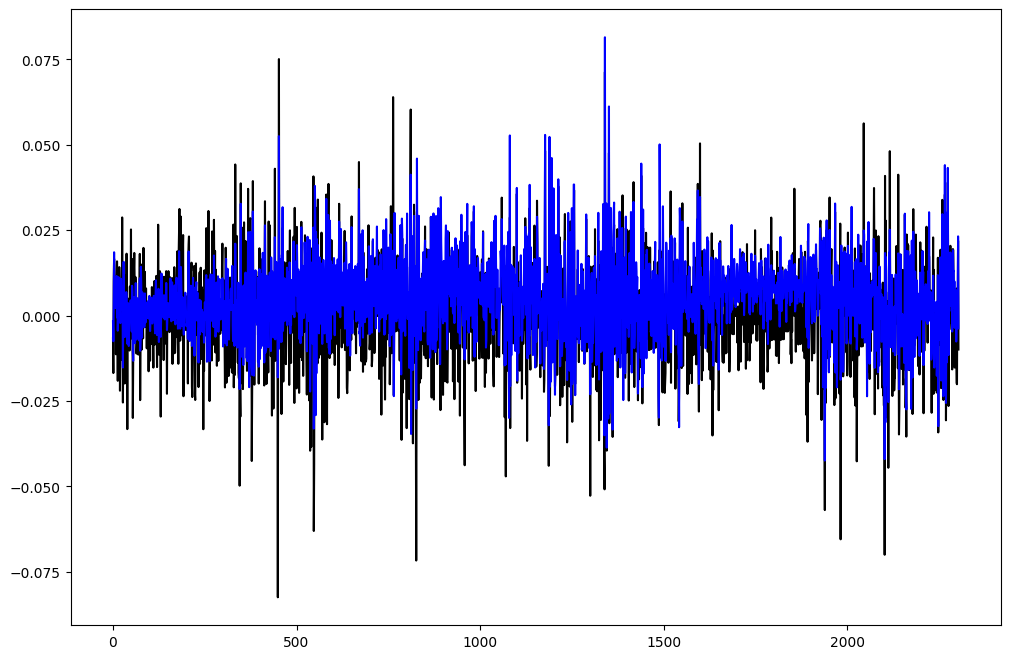

In [13]:
lstm = LSTM(30, 100, 2, 1, 0.2)
lstm = training_LSTM(lstm, original_dataloader, 100, 0.001)

lstm.eval()
predit_y = lstm(train_x_pca)
predit_y = y_scaler.inverse_transform(predit_y.detach().numpy())
actual_y = y_scaler.inverse_transform(train_y_pca.detach().numpy())

plt.figure(figsize=(12, 8))
plt.plot(actual_y, color = 'black')
plt.plot(predit_y_ae, color = 'blue')

In [20]:
# Calcuate accuracy
# AE
y_predict_ae = lstm_ae(test_x_AE)
y_predict_vae = lstm_vae(test_x_VAE)
y_predict = lstm(test_x_pca)

actual_y = y_scaler.inverse_transform(test_y_AE.detach().numpy())
y_predict_ae = y_scaler.inverse_transform(y_predict_ae.detach().numpy())
y_predict_vae = y_scaler.inverse_transform(y_predict_vae.detach().numpy())
y_predict = y_scaler.inverse_transform(y_predict.detach().numpy())

ae = []
vae = []
original = []
for i in range(actual_y.shape[0]):
    if actual_y[i]* y_predict_ae[i] > 0:
        ae.append(1)
    else:
        ae.append(0)
    if actual_y[i]* y_predict_vae[i] > 0:
        vae.append(1)
    else:
        vae.append(0)    
    if actual_y[i]* y_predict[i] > 0:
        original.append(1)
    else:
        original.append(0) 

print(f'AE + LSTM accuracy: {sum(ae)/ len(ae)}')
print(f'VAE + LSTM accuracy: {sum(vae)/ len(vae)}')
print(f'LSTM accuracy: {sum(original) / len(original)}')

AE + LSTM accuracy: 0.5017182130584192
VAE + LSTM accuracy: 0.5240549828178694
LSTM accuracy: 0.5085910652920962


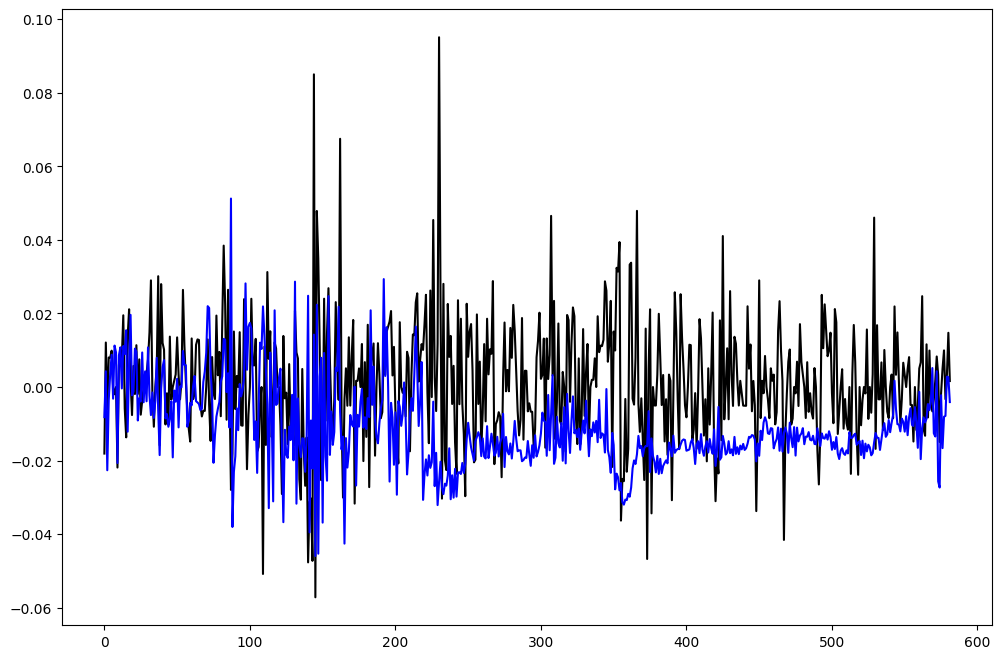

In [22]:
# AE
plt.figure(figsize=(12, 8))
plt.plot(actual_y, color = 'black')
plt.plot(y_predict_ae, color = 'blue')

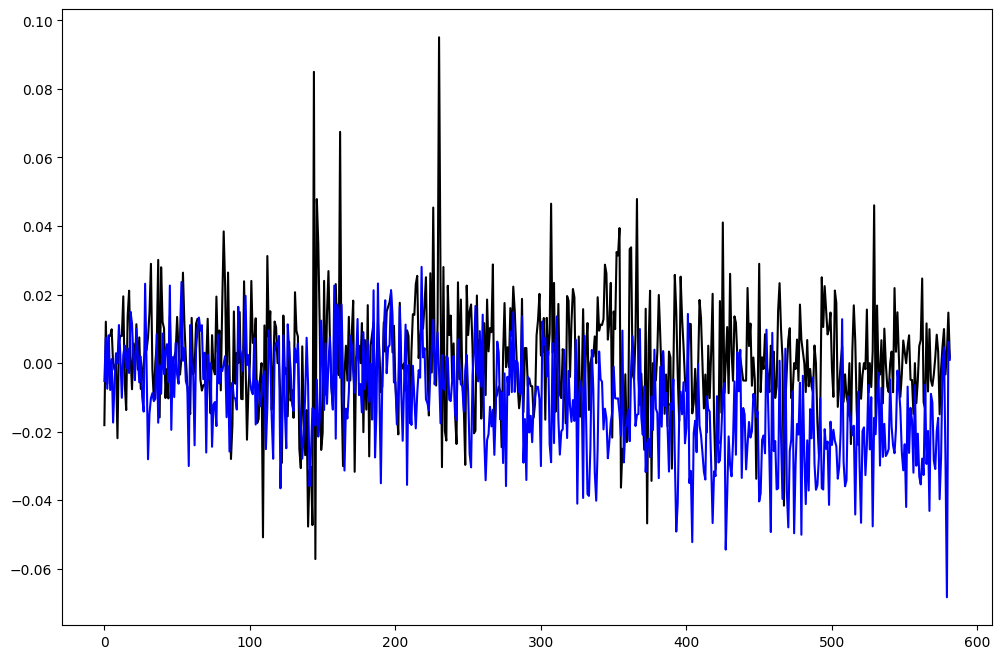

In [23]:
# VAE
plt.figure(figsize=(12, 8))
plt.plot(actual_y, color = 'black')
plt.plot(y_predict_vae, color = 'blue')